In [1]:
#parameters for trying

lambda<-1.4
k<-1:20

## Point 1.1

In [2]:
#definition of the probability density function

dtruncpois <- function(k,lambda){
    return (((lambda**k)*(exp(-lambda)))/((factorial(k))*(1-(exp(-lambda)))))
}

In [3]:
#definition of the cumulative probability distribution

ptruncpois <- function(k,lambda){
    y<-dtruncpois(k,lambda)
    yp<-rep(0,length(y))
    for (i in 1:length(yp)){
        yp[i]<-sum(y[1:i])
    }
    return (yp)
}

## Point 1.2

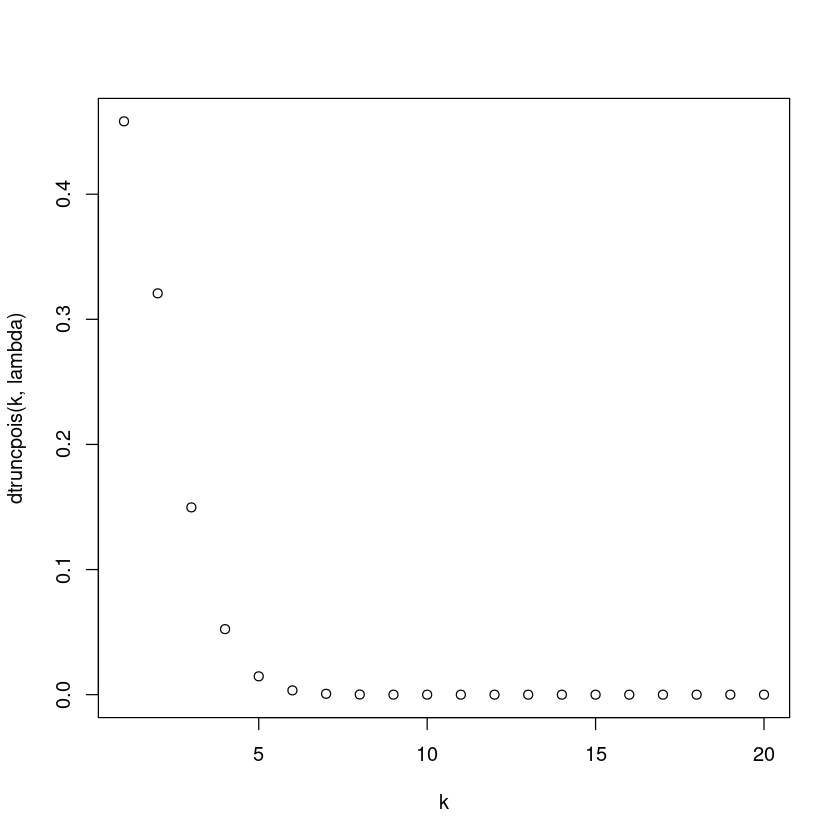

In [4]:
#plot density function

plot(k,dtruncpois(k,lambda))

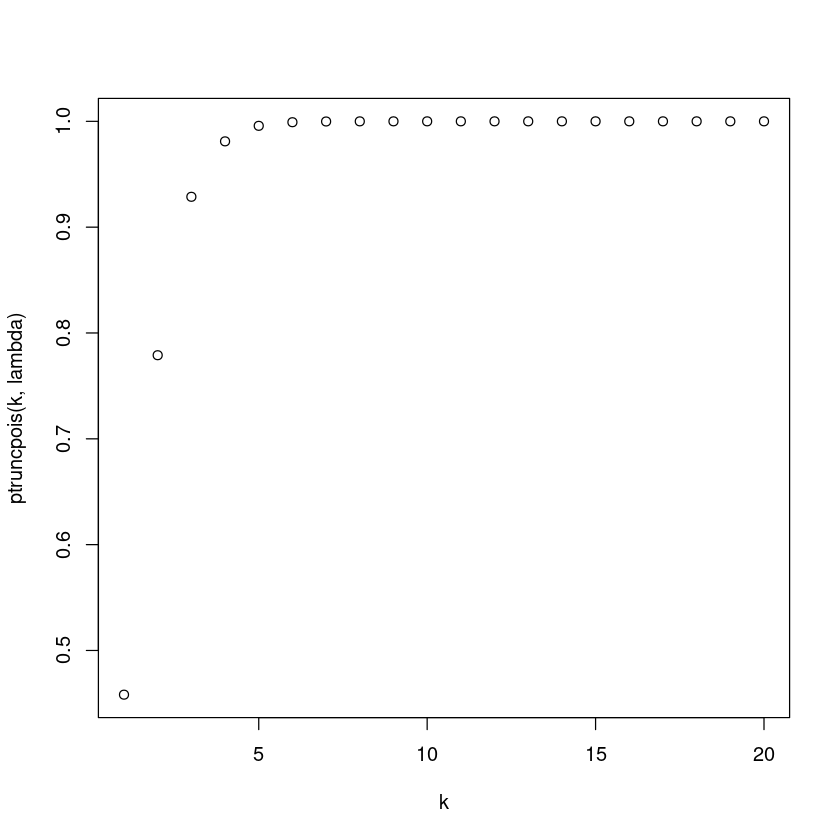

In [5]:
#plot cumulative distribution

plot(k,ptruncpois(k,lambda))

## Point 1.3

In [7]:
#calculating the mean

k_mean<-sum(k*dtruncpois(k,lambda))
k_mean

[1] 1.858235

In [13]:
#calculating the variance

k_variance<-sum((k**2)*dtruncpois(k,lambda))-sum(k*dtruncpois(k,lambda))**2
k_variance

[1] 1.006726

## Point 1.4

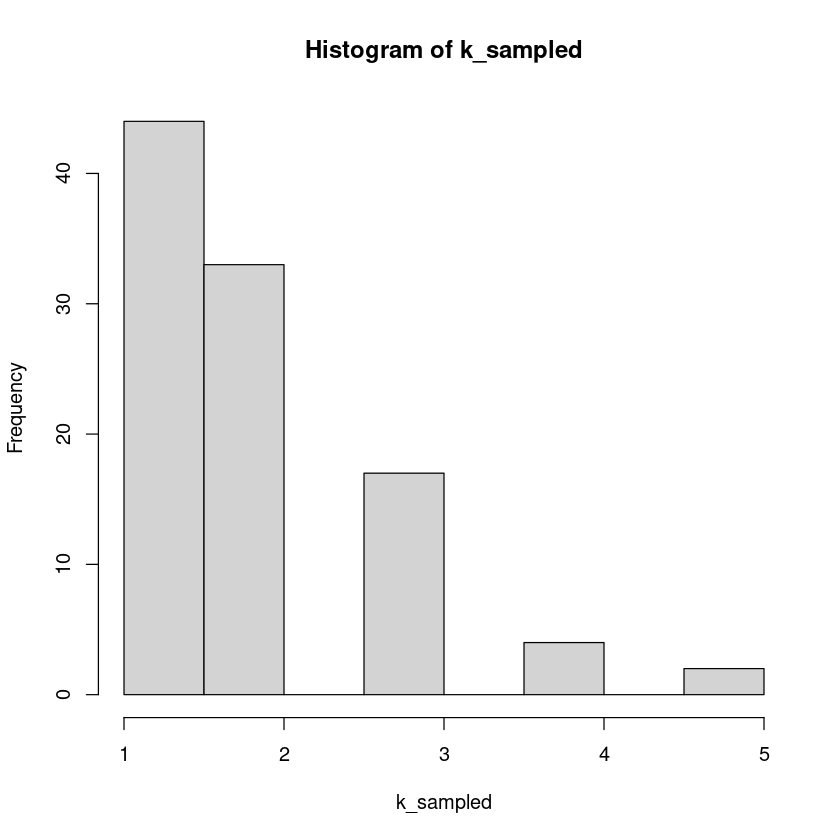

In [25]:
#sampling k according to the distribution

k_sampled<-sample(1:10,100, replace=T, prob=dtruncpois(1:10,lambda))
hist(k_sampled)

In [26]:
sample_mean<-mean(k_sampled)
sample_mean

[1] 1.87

## Point 2.a

In [27]:
#definition of unnormalized function

p_muons_notnorm <- function(E){
    E0<-7.25
    gamma<-2.7
    p<-ifelse(E<E0,1,(E-E0+1)**(-gamma))
    return (p)
}

In [34]:
#finding of N

N<-1/integrate(p_muons_notnorm,0,Inf)$value
N

[1] 0.1275797

In [33]:
#definition of normalized function

p_muons_norm <- function(E){
    N<-0.127579703198913
    p<-N*p_muons_notnorm(E)
    return (p)
}

## Point 2.b

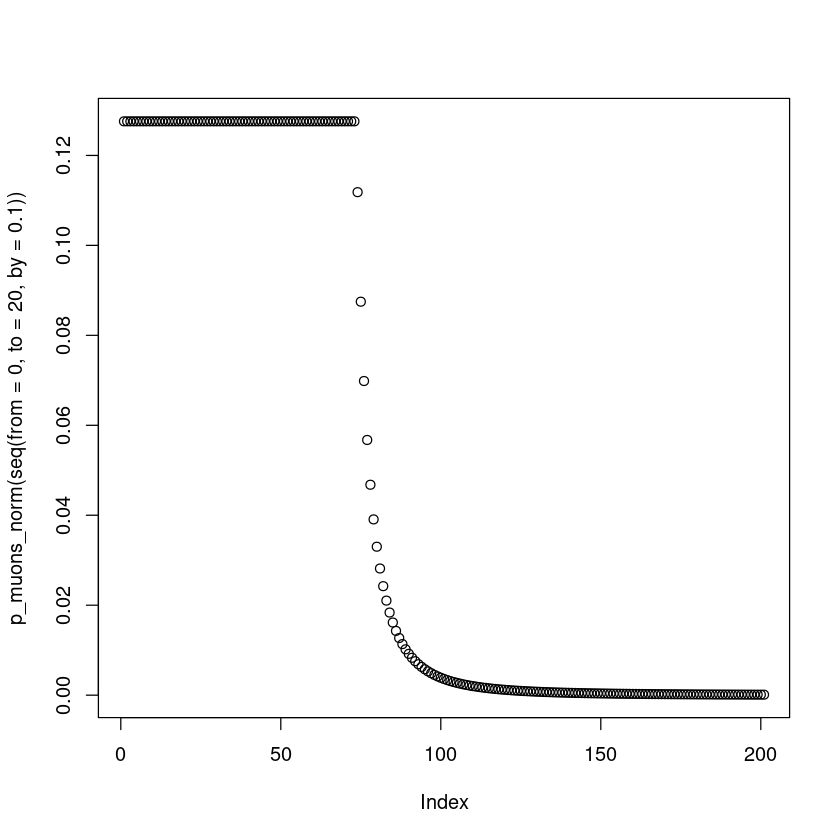

In [38]:
#plotting the probability density function

plot(p_muons_norm(seq(from=0,to=20, by=0.1)))

## Point 2.c

In [39]:
#generic cumulative distr function

cumulativedistr <- function(func){
    y<-func
    yp<-rep(0,length(y))
    for (i in 1:length(yp)){
        yp[i]<-sum(y[1:i])
    }
    return (yp)
}

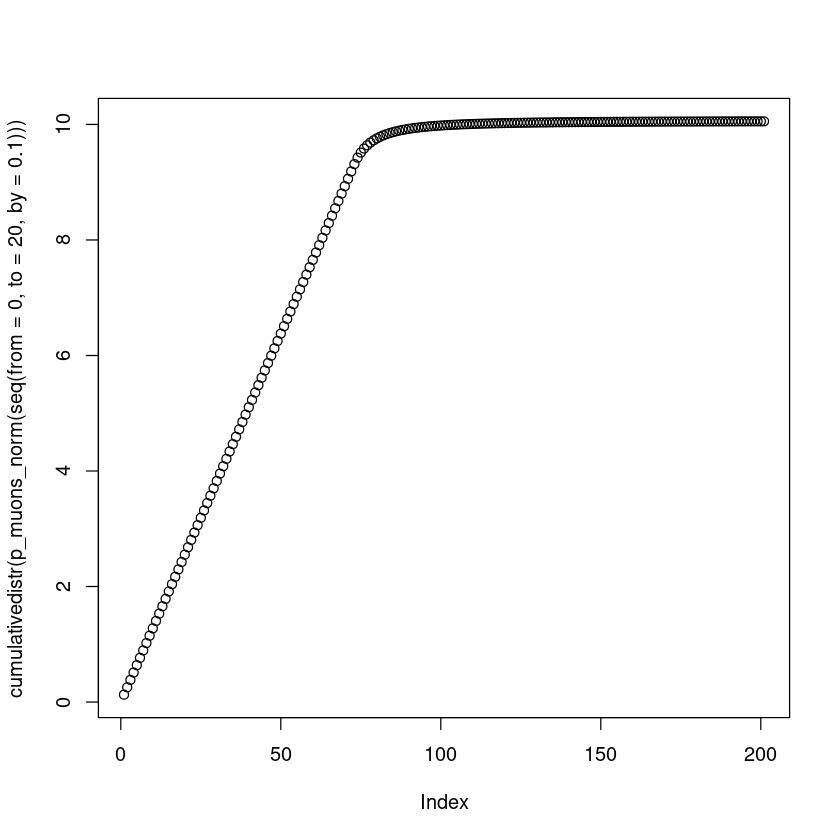

In [40]:
plot(cumulativedistr(p_muons_norm(seq(from=0,to=20, by=0.1))))

## Point 2.d

In [58]:
#calculating mean x value

x<-seq(0,20,0.1)
weighted_x<-function(x){
    return (x*p_muons_norm(x))
}
x_mean<-integrate(weighted_x,0,Inf)$value
x_mean

[1] 4.004251